In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

In [0]:
fuse_file = '/content/drive/My Drive/Geo Project/final_project_point_cloud.fuse'
ecef_file = '/content/drive/My Drive/Geo Project/ecef_file'
flatter = 1.0 / 298.257224


In [0]:
def file_reader(filename):
    data = []
    fusefile = open(filename, 'r') 
    for i in fusefile:
        f = i.split(" ")
        data.append([float(f[0]), float(f[1]), float(f[2]), float(f[3][:-1])])
    fusefile.close()
    return data 



In [5]:
data = np.array(file_reader(fuse_file))
x, y, z, intensity = data.T
print(x)
print(y)
print(z)
print(intensity)

[45.9038834  45.90368343 45.90368259 ... 45.90429957 45.90431674
 45.90429264]
[11.02841352 11.02822054 11.028222   ... 11.02842804 11.02852271
 11.02840125]
[232.4648 234.4706 234.4459 ... 225.2848 225.2883 225.7603]
[10.  5.  7. ...  6.  5.  8.]


In [0]:
def file_write(lines, filename):
    file = open(filename, 'w')
    for line in lines:
            file.write('%s\n' % ' '.join(line))

In [0]:
def ecef_converter(line):
    latitude, longitude, altitude, intensity = map(float, line)
    print(latitude)
    print(longitude)
    print(altitude)
    print(intensity)

    coslatitude = math.cos(latitude * math.pi / 180.0)
    sinlatitude = math.sin(latitude * math.pi / 180.0)
    coslongitude = math.cos(longitude * math.pi / 180.0)
    sinlongitude = math.sin(longitude * math.pi / 180.0)

    C = 1.0 / math.sqrt(coslatitude * coslatitude + (1 - flatter) * (1 - flatter) * sinlatitude * sinlatitude)
    x = (6378137.0 * C + 0.0) * coslatitude * coslongitude
    y = (6378137.0 * C + 0.0) * coslatitude * sinlongitude
    z = altitude

    return map(str, [x, y, z, intensity])


In [0]:
fuse_reader = map(ecef_converter, file_reader(fuse_file))

In [12]:
file_write(fuse_reader, ecef_file)

Streaming output truncated to the last 5000 lines.
11.02853514
225.2529
6.0
45.90431149
11.02855533
225.2084
4.0
45.90429861
11.02852818
225.256
4.0
45.90430994
11.02855227
225.2414
84.0
45.90429479
11.02852033
225.2974
4.0
45.90430814
11.02854842
225.2405
6.0
45.90428945
11.02850895
225.301
3.0
45.9043061
11.02854411
225.2459
4.0
45.90428241
11.02849419
225.335
2.0
45.9043037
11.02853899
225.2462
5.0
45.90427149
11.02847094
225.3453
86.0
45.90431207
11.02855649
225.2269
6.0
45.90429985
11.02853042
225.2533
3.0
45.90431058
11.02855344
225.2505
55.0
45.90429624
11.02852285
225.2802
4.0
45.90430882
11.02854956
225.2344
12.0
45.90429144
11.02851264
225.2925
4.0
45.90430689
11.02854545
225.2422
6.0
45.90428506
11.02849909
225.3161
3.0
45.90430461
11.02854054
225.2408
7.0
45.90427576
11.02847929
225.3396
8.0
45.90431261
11.02855739
225.221
3.0
45.9043011
11.02853286
225.2669
3.0
45.90431116
11.0285545
225.2522
31.0
45.90429757
11.02852523
225.2651
4.0
45.90430949
11.02855077
225.2367
63.0
4

In [13]:
data3 = np.array(file_reader(ecef_file))
x, y, z, intensity = data3.T
print(x)
print(y)
print(z)
print(intensity)

[4363892.1132488  4363910.64554237 4363910.68968454 ... 4363859.2905073
 4363856.53993899 4363860.23114838]
[850500.77770679 850489.1330229  850489.25704986 ... 850495.52862204
 850502.4768474  850493.59401853]
[232.4648 234.4706 234.4459 ... 225.2848 225.2883 225.7603]
[10.  5.  7. ...  6.  5.  8.]


In [0]:
def data_to_matrix(data):
    N = 100.0
    X, Y, Z, I = np.array(data).T
    print("ecef output")
    print("latitude")
    print(X,"\n")
    print("longitude")
    print(Y,"\n")
    print("altitude")
    print(Z,"\n")
    print("Intensity")
    print(I,"\n")
    min_x, max_x, min_y, max_y = min(X), max(X), min(Y), max(Y)
    difference = (max_x - min_x) / N
    print("Difference = ", difference)
    Y_difference = int((max_y - min_y) / difference)
    print("Y difference = ", Y_difference)

    matrix = [[[] for _ in range(int(Y_difference))] for _ in range(int(N))]
    for x, y, z, i in data:
        xi = int((x - min_x) / difference)
        yi = int((y - min_y) / difference)
        matrix[xi - 1][yi - 1].append((x, y, z, i))


    line_list = []
    data_list = []
    X_len, Y_len = len(matrix), len(matrix[0])
    for i in range(X_len):
        for j in range(Y_len):
            line_list.append(min(matrix[i][j], key=lambda n: n[2])[2] if matrix[i][j] else 222.34)
        data_list.append(line_list)
        line_list = []
    gaussian_matrix = np.array(data_list)
    image_block = np.ones((6, 6), np.uint8)
    print("Image Block\n", image_block)
  
    line_list = []
    data_list = []
    overlay = cv2.erode(gaussian_matrix, image_block, iterations=1)
    for i in range(X_len):
        for j in range(Y_len):
            line_list.append(overlay[i][j] if overlay[i][j] != 223 else 223)
        data_list.append(line_list)
        line_list = []
    overlay = np.array(data_list)
    overlay = cv2.dilate(overlay, image_block, iterations=3)



    line_list = []
    data_list = []
    for i in range(X_len):
        for j in range(Y_len):
            line_list.append(1 if overlay[i][j] >= 224.5 else 0)
        data_list.append(line_list)
        line_list = []
    overlay = np.array(data_list)

    image_block = np.ones((10, 10), np.uint8)
    print("\nImage Block\n",image_block)
    gaussian_matrix = cv2.erode(gaussian_matrix, image_block, iterations=1)

    return gaussian_matrix, overlay


In [15]:
read_ecef = file_reader(ecef_file)
gaussian_matrix, overlay = data_to_matrix(read_ecef)
print("\nGaussian Matrix")
print(gaussian_matrix)
print(gaussian_matrix.shape)
print("\n")
print("overlay\n", overlay)
print("\n")
gaussian_blur = cv2.GaussianBlur(gaussian_matrix,(9,9),0)
mean = gaussian_matrix[overlay==1].mean()
print("Mean = ",mean)


ecef output
latitude
[4363892.1132488  4363910.64554237 4363910.68968454 ... 4363859.2905073
 4363856.53993899 4363860.23114838] 

longitude
[850500.77770679 850489.1330229  850489.25704986 ... 850495.52862204
 850502.4768474  850493.59401853] 

altitude
[232.4648 234.4706 234.4459 ... 225.2848 225.2883 225.7603] 

Intensity
[10.  5.  7. ...  6.  5.  8.] 

Difference =  1.1216225094534458
Y difference =  174
Image Block
 [[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]

Image Block
 [[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]

Gaussian Matrix
[[222.34 222.34 222.34 ... 222.34 222.34 222.34]
 [222.34 222.34 222.34 ... 222.34 222.34 222.34]
 [222.34 222.34 222.34 ... 222.34 222.34 222.34]
 ...
 [222.34 222.34 222.34 ... 222.34 222.34 222.34]
 [222.34 222.34 222.3

In [0]:
line_list = []
data_list = []
for i in range(len(gaussian_matrix)):
    for j in range(len(gaussian_matrix[0])):
        line_list.append(mean if overlay[i][j] else gaussian_blur[i][j])
    data_list.append(line_list)
    line_list = []
image = np.array(data_list)
image = cv2.GaussianBlur(image, (9, 9), 0)

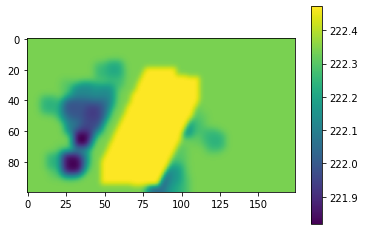

In [17]:
plt.imshow(image)
plt.colorbar()
plt.show()
        